In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

In [63]:
from google.colab import files
uploaded=files.upload()

Saving glass.xlsx to glass (1).xlsx


In [64]:
data=pd.read_excel('glass.xlsx',sheet_name='glass')

In [65]:
data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [67]:
data.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [68]:
data[data.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [69]:
data=data.drop_duplicates()

In [70]:
data[data.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type


In [71]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518348,13.404085,2.679202,1.449484,72.655070,0.498873,8.954085,0.175869,0.057277,2.788732
std,0.003033,0.816662,1.443691,0.495925,0.773998,0.653185,1.425882,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.810000,3.600000,1.630000,73.090000,0.610000,9.150000,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


Outliers calculation for RI
Axes(0.125,0.11;0.775x0.77)
count    213.000000
mean       1.518348
std        0.003033
min        1.511150
25%        1.516520
50%        1.517680
75%        1.519150
max        1.533930
Name: RI, dtype: float64
count    213.000000
mean       1.518348
std        0.003033
min        1.511150
25%        1.516520
50%        1.517680
75%        1.519150
max        1.533930
Name: RI, dtype: float64
Quartile 1 :  1.51652
Quartile 3 :  1.51915
Inter-Quartile Range :  0.00262999999999991
Upper Limit :  1.5230949999999999
Lower Limit :  1.5125750000000002
          RI     Na    Mg    Al     Si     K     Ca    Ba    Fe  Type
47   1.52667  13.99  3.70  0.71  71.57  0.02   9.82  0.00  0.10     1
50   1.52320  13.72  3.72  0.51  71.75  0.09  10.06  0.00  0.16     1
56   1.51215  12.99  3.47  1.12  72.98  0.62   8.35  0.00  0.31     1
103  1.52725  13.80  3.15  0.66  70.57  0.08  11.64  0.00  0.00     2
104  1.52410  13.83  2.90  1.17  71.15  0.08  10.79  0.00  0.00     

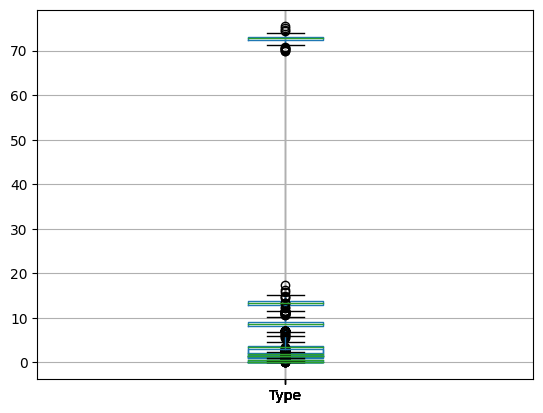

In [72]:
#Outlier Detection for all columns
Num_Columns= ['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type']
for i in Num_Columns:
  column_name = i
  print("Outliers calculation for", i)
  print(data.boxplot(column=[column_name],grid=True))
  print(data[column_name].describe())
#Quartile 1
  print(data[column_name].describe())
  Q1=data[column_name].quantile(0.25)
  print('Quartile 1 : ',Q1)
#Quartile 3
  Q3=data[column_name].quantile(0.75)
  print('Quartile 3 : ',Q3)
#Interquartile Range
  IQR= Q3 - Q1
  print('Inter-Quartile Range : ',IQR)
#Upper Limit
  UL = Q3 + (1.5 * IQR)
  print('Upper Limit : ',UL)
#Lower Limit
  LL = Q1 - (1.5 * IQR)
  print('Lower Limit : ', LL)
  Outliers=data[(data[column_name] > UL) | (data[column_name] < LL)]
  print(Outliers)
  print('__________________________________________________________')

In [73]:
data.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

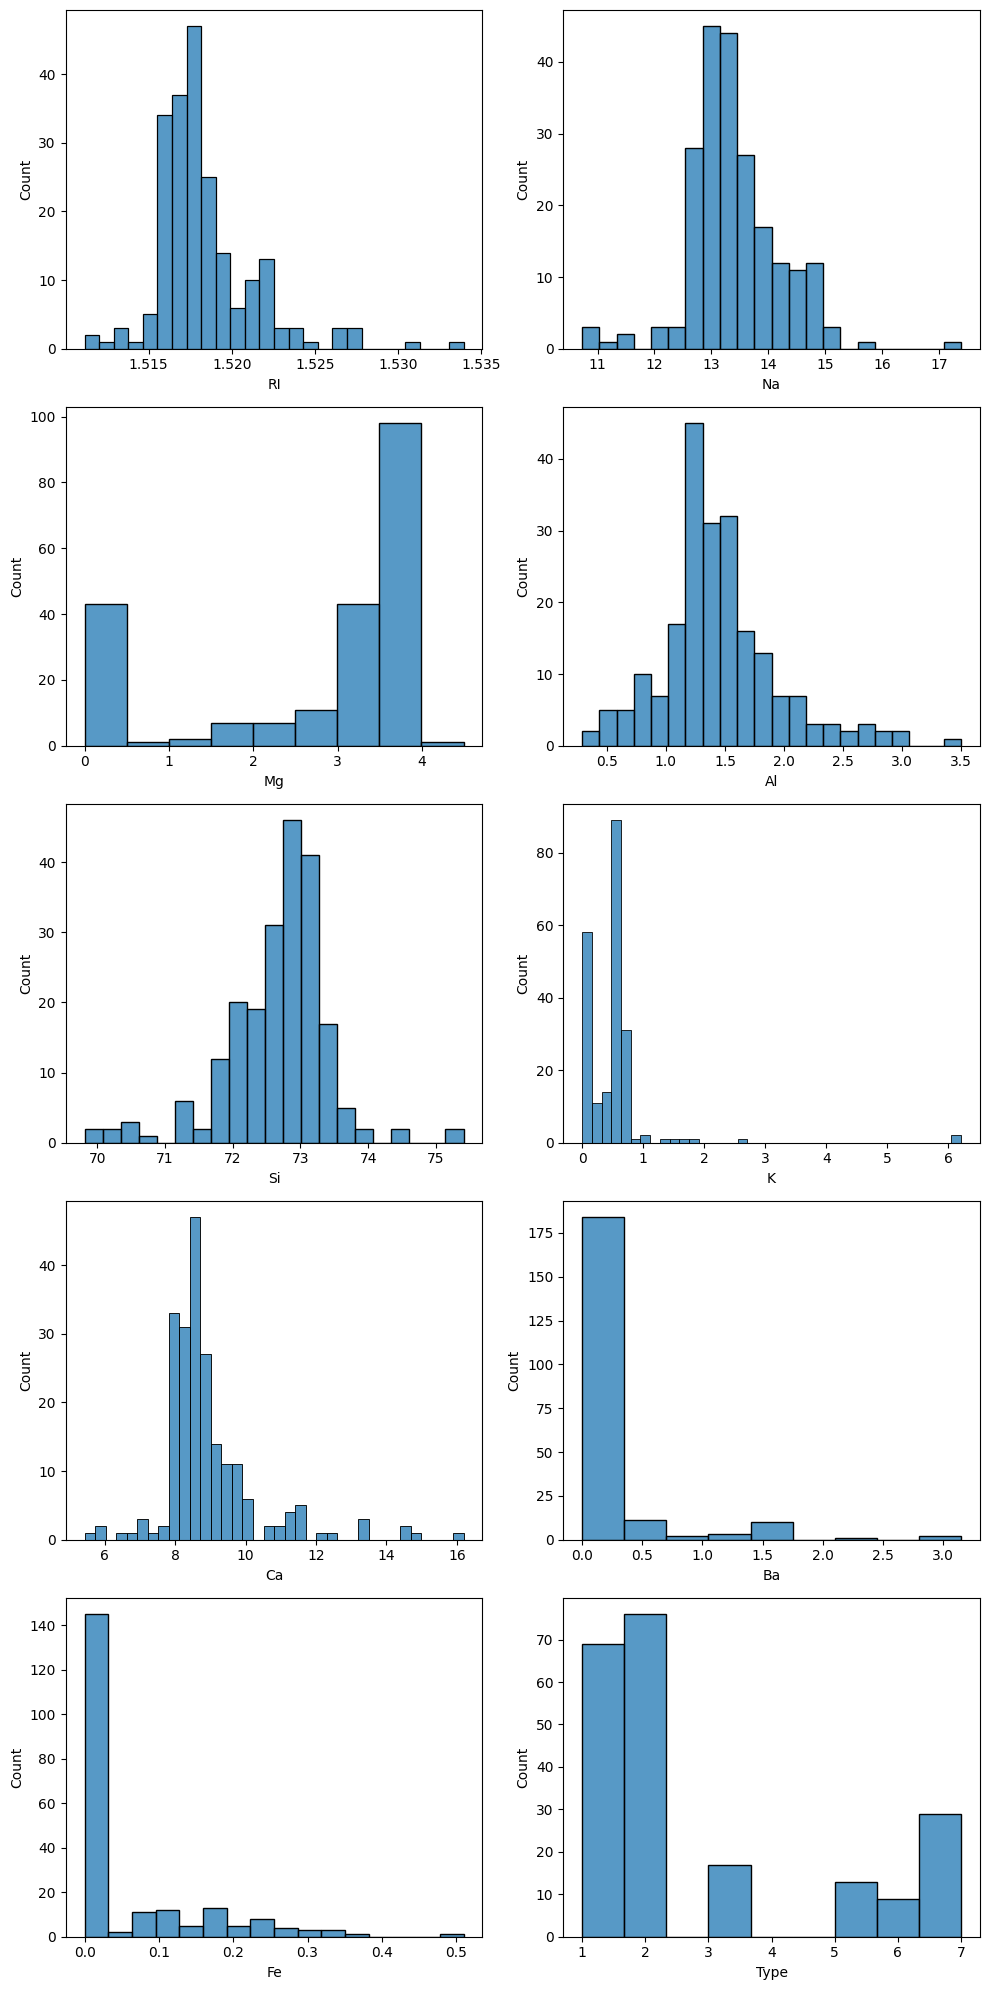

In [74]:
# PLOTTING HISTOGRAM ==> HERE WE CAN SEE OUTLIERS
fig, ax = plt.subplots(5, 2, figsize=(10, 20))

sns.histplot(data['RI'], ax = ax[0,0])
sns.histplot(data['Na'], ax = ax[0,1])
sns.histplot(data['Mg'], ax = ax[1,0])
sns.histplot(data['Al'], ax = ax[1,1])
sns.histplot(data['Si'], ax = ax[2,0])
sns.histplot(data['K'], ax = ax[2,1])
sns.histplot(data['Ca'], ax = ax[3,0])
sns.histplot(data['Ba'], ax = ax[3,1])
sns.histplot(data['Fe'], ax = ax[4,0])
sns.histplot(data['Type'], ax = ax[4,1])

plt.tight_layout()

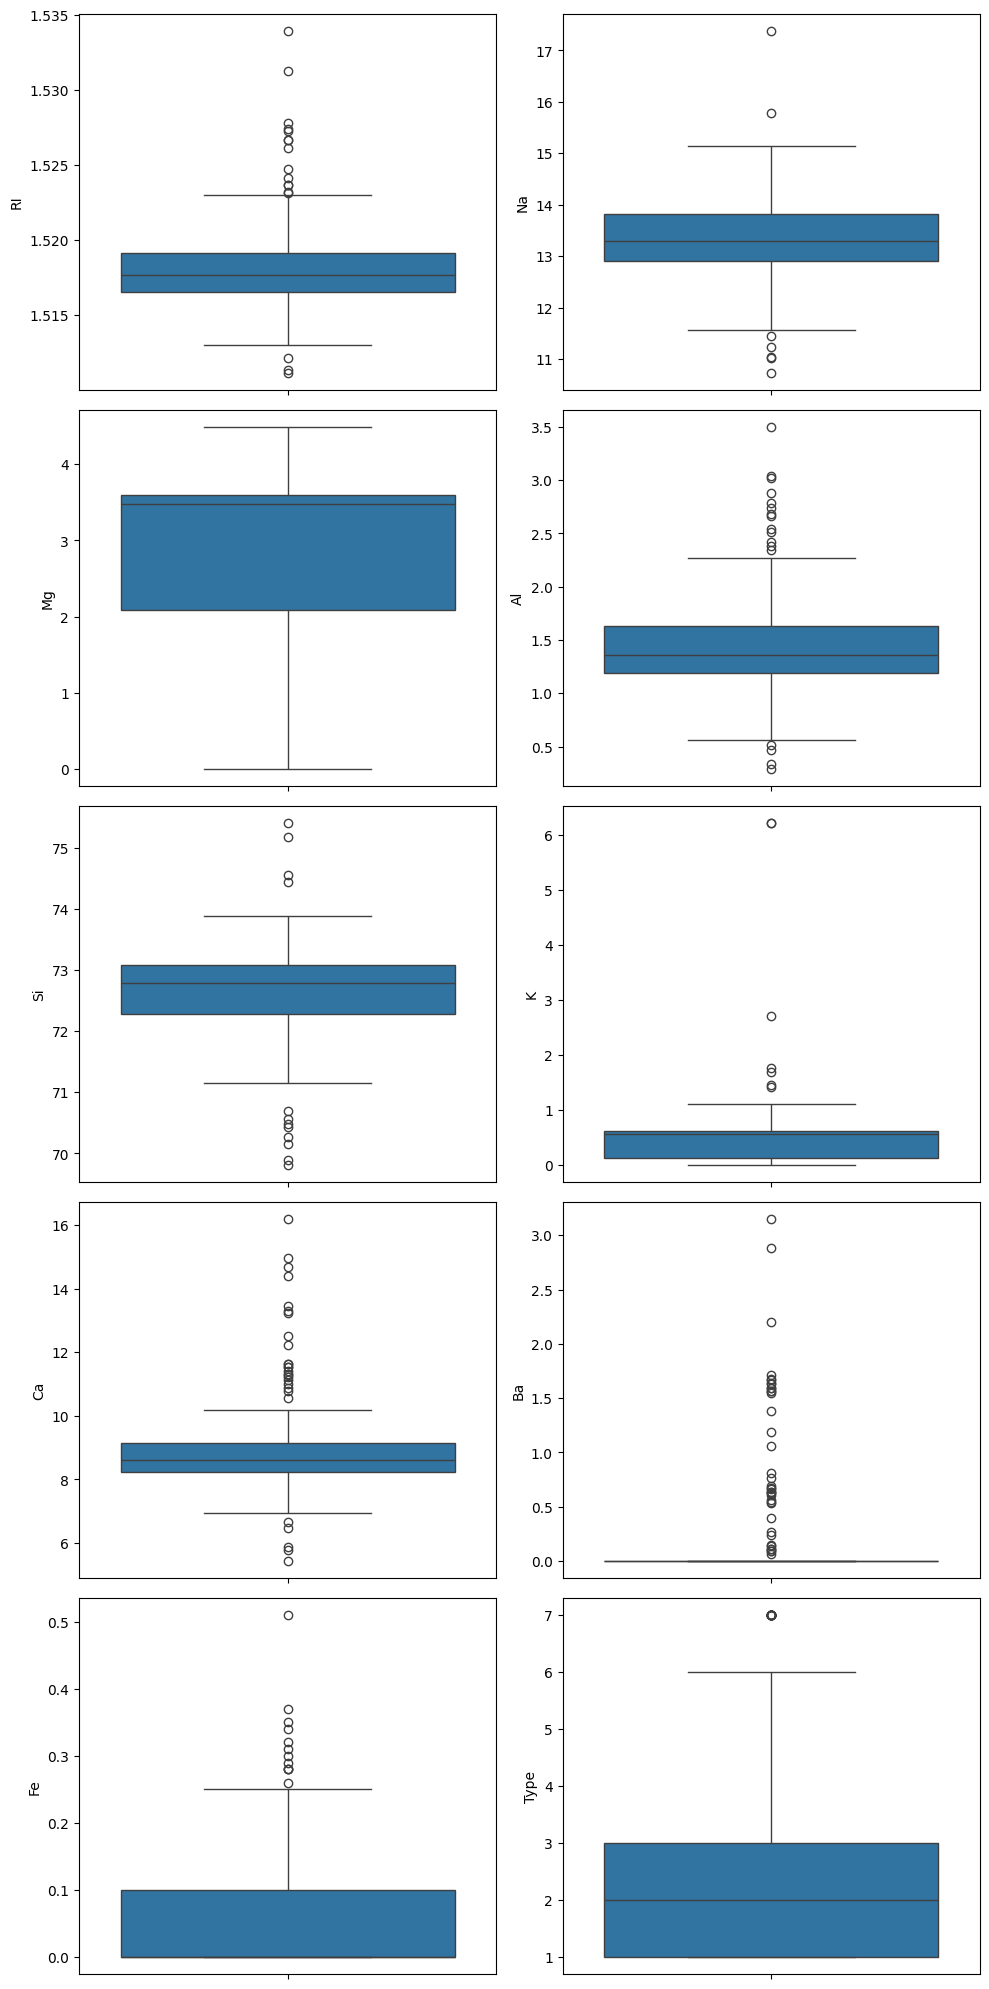

In [75]:
# PLOTTING BOXPLOT ==> HERE WE CAN SEE OUTLIERS
fig, ax = plt.subplots(5, 2, figsize=(10, 20))

sns.boxplot(data['RI'], ax = ax[0,0])
sns.boxplot(data['Na'], ax = ax[0,1])
sns.boxplot(data['Mg'], ax = ax[1,0])
sns.boxplot(data['Al'], ax = ax[1,1])
sns.boxplot(data['Si'], ax = ax[2,0])
sns.boxplot(data['K'], ax = ax[2,1])
sns.boxplot(data['Ca'], ax = ax[3,0])
sns.boxplot(data['Ba'], ax = ax[3,1])
sns.boxplot(data['Fe'], ax = ax[4,0])
sns.boxplot(data['Type'], ax = ax[4,1])

plt.tight_layout()

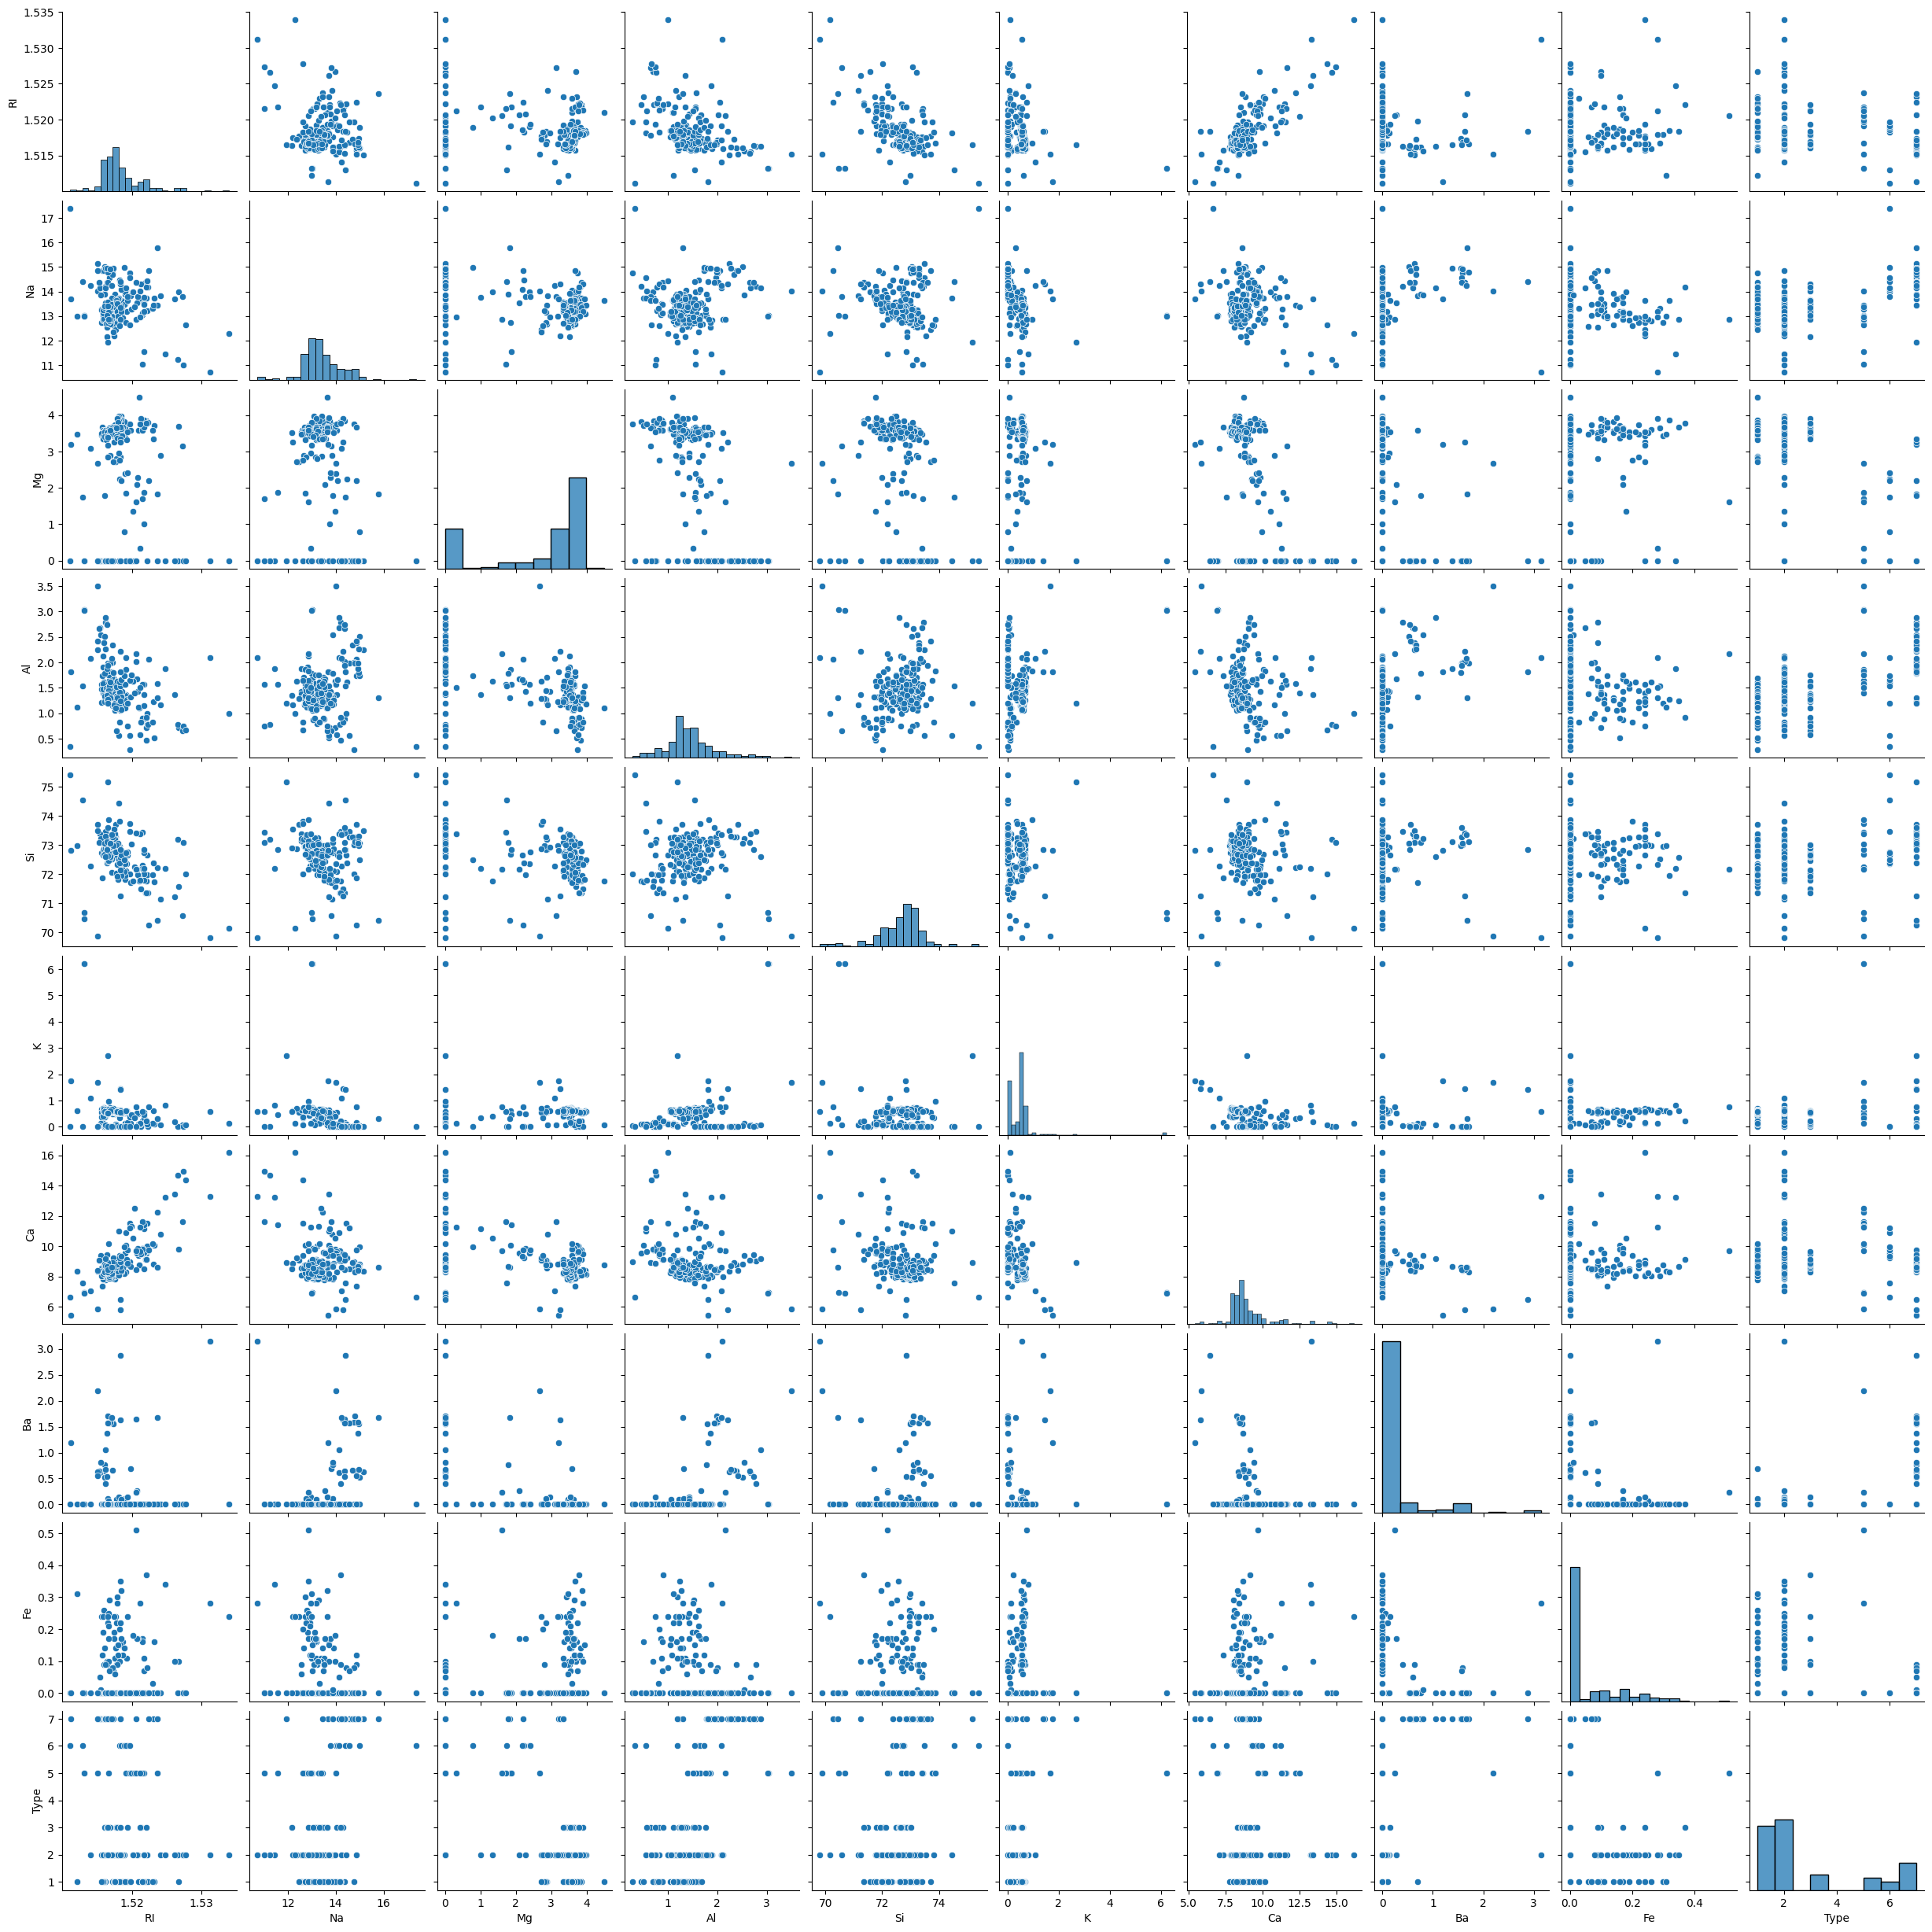

In [76]:
sns.pairplot(data)

In [77]:
glass=data.copy()

In [78]:
glass.shape

(213, 10)

In [79]:
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [80]:
array1=data.values
array1

array([[ 1.52101, 13.64   ,  4.49   , ...,  0.     ,  0.     ,  1.     ],
       [ 1.51761, 13.89   ,  3.6    , ...,  0.     ,  0.     ,  1.     ],
       [ 1.51618, 13.53   ,  3.55   , ...,  0.     ,  0.     ,  1.     ],
       ...,
       [ 1.52065, 14.36   ,  0.     , ...,  1.64   ,  0.     ,  7.     ],
       [ 1.51651, 14.38   ,  0.     , ...,  1.57   ,  0.     ,  7.     ],
       [ 1.51711, 14.23   ,  0.     , ...,  1.67   ,  0.     ,  7.     ]])

In [81]:
X = array1[:,0:9]
Y = array1[:,9]

In [82]:
X.shape

(213, 9)

In [83]:
#SPLITTING DATA INTO TRAINING AND TESTING DATASET
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=40)

In [84]:
from sklearn.linear_model import LinearRegression
clf= LinearRegression()

In [85]:
clf.fit(X_train,Y_train)

LinearRegression()

In [86]:
clf.predict(X_test)

array([2.17479654, 1.34305715, 2.87430598, 7.16694061, 3.29129281,
       1.52010762, 2.2193337 , 1.71717366, 6.91823995, 1.88352356,
       1.25804954, 1.86322521, 2.11848497, 0.91031419, 2.33900046,
       1.79781091, 1.93801198, 2.19742416, 6.93390494, 1.91282399,
       1.85631747, 1.68921121, 0.14617783, 1.82774898, 5.28976136,
       4.57388779, 3.69993194, 1.74127003, 1.68543092, 4.77274208,
       1.86303297, 1.66553085, 4.33741204, 1.97065345, 1.76562604,
       2.36219075, 4.29429405, 1.9226326 , 1.63063857, 1.90187014,
       2.12704211, 7.2591135 , 1.85274014])

In [87]:
Y_test

array([2., 1., 6., 7., 6., 1., 2., 1., 7., 1., 2., 3., 1., 2., 2., 2., 1.,
       2., 7., 1., 1., 3., 3., 2., 2., 7., 2., 2., 1., 5., 1., 2., 2., 1.,
       1., 2., 6., 2., 1., 2., 2., 7., 2.])

In [88]:
clf.score(X_test,Y_test)  #ACCURACY

0.6198309868640632

In [89]:
# Bagging
RF=RandomForestClassifier()                 # RANDOM MODEL FOREST ACCURACY
RF.fit(X_train,Y_train)
kfold = KFold(n_splits=3, random_state=15,shuffle=True)
dtc = DecisionTreeClassifier()
model = BaggingClassifier(base_estimator=dtc, n_estimators=250, random_state=15)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7230046948356806


In [90]:
pred=RF.predict(X_test)
pred

array([2., 1., 1., 7., 6., 3., 1., 2., 7., 1., 1., 3., 2., 2., 2., 2., 2.,
       2., 7., 1., 1., 1., 1., 2., 2., 7., 5., 2., 1., 5., 1., 1., 2., 1.,
       1., 2., 6., 2., 1., 2., 2., 7., 2.])

In [91]:
accuracy=RF.score(X_test, Y_test)     #ACCURACY FOR LINEAR REGRESSION
accuracy

0.7441860465116279

**BASED ON GINI CRITERIA**

In [92]:
kfold = KFold(n_splits=3, random_state=15,shuffle=True)
model = RandomForestClassifier(n_estimators=300, max_features=5,criterion='gini')
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.727699530516432


**ADAPTIVE** **BOOSTING**

In [93]:
kfold = KFold(n_splits=3, random_state=15,shuffle=True)
model = AdaBoostClassifier(n_estimators=50, random_state=15)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())                             #ACCURACY IS TOO MUCH POOR

0.40845070422535207


In [94]:
# Stacking Ensemble estimators for Classification
kfold = KFold(n_splits=3, random_state=15,shuffle=True)
kfold

KFold(n_splits=3, random_state=15, shuffle=True)

In [95]:
# create the sub models
estimators = []
model1 = LogisticRegression(max_iter=200)
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('dtc', model2))
model3 = SVC()
estimators.append(('svm', model3))
estimators

[('logistic', LogisticRegression(max_iter=200)),
 ('dtc', DecisionTreeClassifier()),
 ('svm', SVC())]

In [96]:
# create the ensemble model
ensemble = VotingClassifier(estimators)                   # here the accuracy is not much so that mean we have to do more data cleaning to make it more accuracy
results = cross_val_score(ensemble, X, Y, cv=kfold)
print(results.mean())

0.568075117370892
